# Sumário
* [Entendimento do Problema](#entendimento_problema)
* [Entendimento dos Dados](#entendimento_dados)
* [Preparação dos Dados](#preparação_dados)
* [Modelagem](#modelagem)
* [Avaliação](#avaliação)
* [Conclusão](#conclusão)

# Entendimento do Problema <a class="anchor" id="entendimento_problema"></a>

O desafio do Titanic é no [Kaggle](https://www.kaggle.com/c/titanic) é um dos clássicos problemas para quem está iniciando suas atividades no mundo da Ciência de Dados.

O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável". No entanto, com cerca de 2200 passageiros a bordo, o Titanic colidiu com um iceberg matando aproximadamente 1500 pessoas, sendo um dos maiores desastres marítimos de toda a história. Contudo, a seguinte pergunta pode ficar no ar: será que a sobrevivência de alguns passageiros se deu por pura sorte ou alguns passageiros realmente tinham mais chances de sobreviver do que outros? 

![Titanic, ABC](Imagens/Titanic/Titanic.jpg)

Dito isto, o objetivo deste estudo é tirar alguns insights em cima desse conjunto de dados (que por sua vez são dados reais) e, em seguida, treinar um modelo de Machine Learning capaz de prever se um passageiro sobreviveria/sobreviveu ou não a esse desastre.

# Entendimento dos Dados <a class="anchor" id="entendimento_dados"></a>

#### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

%matplotlib inline
sns.set_style("dark")

import warnings
warnings.filterwarnings('ignore')

#### Obtenção dos dados

Os dados foram disponibilizados no [Kaggle](https://www.kaggle.com/c/titanic). Esta é uma competição muito famosa no Kaggle e muitos a consideram como sendo um "Hello World" para quem está dando os primeiros passos no mundo da Ciência de Dados.

Nesta competição são disponibilizados três arquivos: 'train.csv', 'test.csv' e 'gender_submission.csv'. O primeiro arquivo contém os dados que serão utilizados no treinamento no modelo, o segundo arquivo contém os dados que serão utilizados na etapa de teste do modelo e o último contém um modelo de como deve ser o arquivo enviado ao Kaggle.

In [2]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Número de Atributos:\t", training_set.shape[1])
print("Número de registros no conjunto de treino:\t", training_set.shape[0])
print("Número de registros no conjunto de teste:\t", test_set.shape[0])

Número de Atributos:	 12
Número de registros no conjunto de treino:	 891
Número de registros no conjunto de teste:	 418


#### Dicionário de Dados

* **PassengerId:** ID do passageiro
* **Survived:** Indica se o passageiro sobreviveu ou não
    * 0 = Não sobreviveu
    * 1 = Sobreviveu
* **Pclass:** Classe ocupada pelo passageiro
    * 1 = Primeira classe
    * 2 = Segunda classe
    * 3 = Terceira classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Número de irmãos/cônjuges a bordo do Titanic
* **Parch:** Número de pais/filhos a bordo do Titanic
* **Ticket:** Número do bilhete
* **Fare:** Valor do bilhete
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Local de embarque do passageiro
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

#### Tipo dos Atributos

In [4]:
training_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* **Numérico Inteiro**
    * PassengerId
    * Survived
    * Pclass
    * SibSp
    * Parch
* **Numérico Real**
    * Age
    * Fare
* **Categóricos**
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

#### Exploração dos Dados <a class="anchor" id="exploração_dados"></a>

Após verificado o que cada atributo representa e o seu tipo, é importante verificar se os dados apresentam algum tipo de valor faltante, a existência de outliers, distribuição estatística dos atributos numéricos, etc.

Abaixo os dois conjunto de dados (treino e teste) serão combinados em apenas um dataset, já que qualquer modificação realizada em cima do conjunto de treinamento também deverá ser realizada no conjunto de teste. Dessa forma, economizamos linhas de código. E ao final, basta separar novamente os conjuntos entre treino e teste.

In [5]:
# Dimensão dos dados
dados = pd.concat([training_set, test_set]).reset_index()
dados.shape

(1309, 13)

In [6]:
# Distribuição estatística dos dados
dados.describe()

,index,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,369.478992,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,248.767105,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.000000,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,163.000000,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,327.000000,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,563.000000,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,890.000000,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


Abaixo podemos ver que a maior parte dos dados faltantes estão nos atributos **Age**, **Cabin** e **Survived**.

Os 418 valores faltantes no atributo **Survived** já era de se esperar, já que esses valores pertencem ao conjunto de teste, os quais iremos prever baseado em algum algoritmo de machine learning.

Quanto ao atributo **Cabin**, esses valores faltantes não prejudicam em nada a análise que será feita aqui, já que esse atributo não agrega informação útil.

Quanto ao atributo **Age**, esta informação sim pode ser útil de alguma forma. Assim sendo, na etapa de preparação dos dados esses valores faltantes deverão ser preenchidos, por exemplo pela média, moda ou mediana deste atributo.

E por fim, os 3 valores faltantes nos atributos **Embarked** e **Fare** serão preenchidos com a moda (valor mais frequente) em cada um desses atributos.

In [7]:
print(dados.isnull().sum())

index             0
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


Da Matriz de Correlação abaixo podemos ver a correlação entre os atributos. Os atributos mais correlacionados (negativamente) são: Fare e Pclass. Esta correlação faz todo sentido, já que os passageiros da primeira classe (valor 1 no atributo Pclass) pagaram uma passagem mais cara que os passageiros da terceira classe (valor 3 no atributo Pclass).

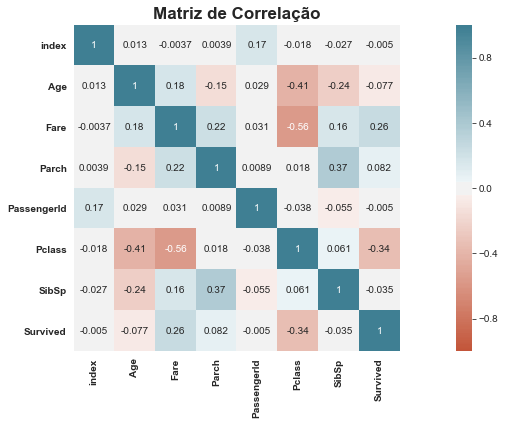

In [8]:
corr = dados.corr()

plt.subplots(figsize=(20,6))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)

ax.set_title('Matriz de Correlação', fontweight='bold', fontsize=17)
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontweight='bold')
plt.show()

Do gráfico abaixo podemos ver que havia aproximadamente o dobro de pessoas do sexo masculino se comparado com a quantidade de pessoas do sexo feminino.

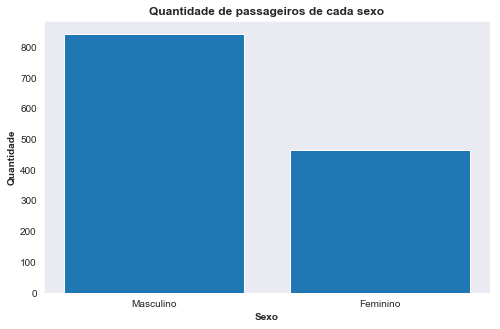

In [9]:
info = dados['Sex'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(['Masculino', 'Feminino'], info)
plt.title('Quantidade de passageiros de cada sexo', fontweight='bold')
plt.xlabel('Sexo', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.show()

Do gráfico abaixo podemos ver que a grande maioria dos passageiros embarcou na cidade de Southampton.

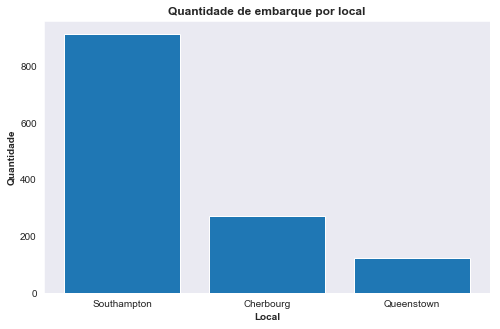

In [10]:
info = dados['Embarked'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(['Southampton', 'Cherbourg', 'Queenstown'], info)
plt.title('Quantidade de embarque por local', fontweight='bold')
plt.xlabel('Local', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.show()

No gráfico abaixo é possível ver que mais da metade dos passageiros a bordo do Titanic pertenciam à 3ª classe.

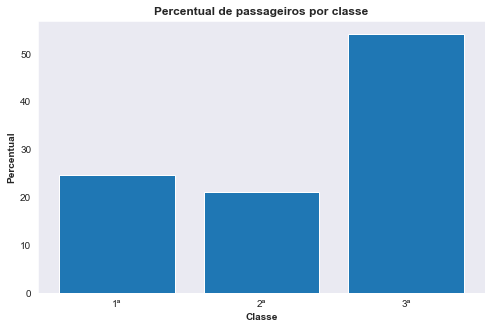

In [11]:
info = dados['Pclass'].value_counts().sort_index()
info = 100 * info / sum(info)

plt.figure(figsize=(8,5))
plt.bar(info.index.astype(str), info)
plt.xticks([0,1,2], ('1ª', '2ª', '3ª'))
plt.title('Percentual de passageiros por classe', fontweight='bold')
plt.xlabel('Classe', fontweight='bold')
plt.ylabel('Percentual', fontweight='bold')
plt.show()

Na média, os passageiros da 1ª classe tem mais idade, enquanto que os passageiros da 3ª classe são mais jovens.

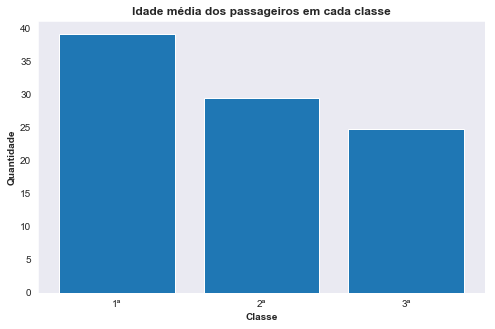

In [12]:
# Média de idade em cada classe, desconsiderando os valores faltantes
info = dados[dados['Age'].notnull()]
info = dados[['Age', 'Pclass']].groupby('Pclass').mean()
    
plt.figure(figsize=(8,5))
plt.bar(info.index.astype(str), info['Age'])
plt.xticks([0,1,2], ('1ª', '2ª', '3ª'))
plt.title('Idade média dos passageiros em cada classe', fontweight='bold')
plt.xlabel('Classe', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.show()

Como já era de se esperar, considerando a quantidade de passageiros em cada classe, a 1ª classe foi a que apresentou um maior percentual de passageiros sobreviventes, seguida pela 2ª classe e, por último, a 3ª classe.

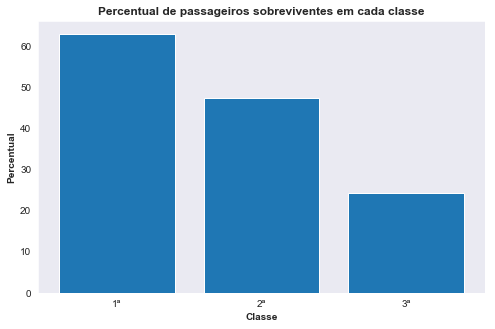

In [13]:
# Percentual de passageiros que sobreviveram em cada uma das classes
info = dados[['Survived', 'Pclass']].groupby('Pclass').mean()

plt.figure(figsize=(8,5))
plt.bar(info.index.astype(str), info['Survived'] * 100)
plt.xticks([0,1,2], ('1ª', '2ª', '3ª'))
plt.title('Percentual de passageiros sobreviventes em cada classe', fontweight='bold')
plt.xlabel('Classe', fontweight='bold')
plt.ylabel('Percentual', fontweight='bold')
plt.show()

Como podemos ver no gráfico abaixo, dentre os sobreviventes em cada uma das três classes, a maior parte deles são do sexo feminino.

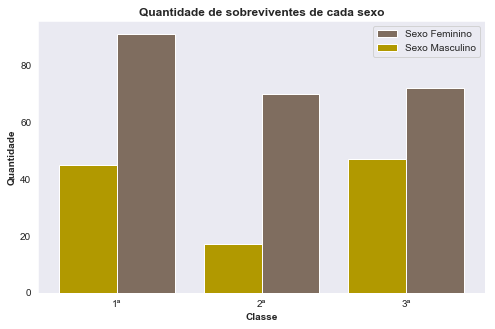

In [14]:
# Sexo dos sobreviventes em cada classe
info = dados[dados['Survived'] == 1][['Sex', 'Pclass']]
b1 = info[info['Sex'] == 'female'].groupby('Pclass').count()
b2 = info[info['Sex'] == 'male'].groupby('Pclass').count()

barHeight = 0.4
    
r = np.arange(len(b1.index))
r1 = [x + barHeight/2 + 1 for x in r]
r2 = [x - barHeight/2 + 1 for x in r]

plt.figure(figsize=(8,5))
barra1 = plt.bar(r1, b1['Sex'], color='#7f6d5f', width=barHeight, edgecolor='white', label='Sexo Feminino')
barra2 = plt.bar(r2, b2['Sex'], color='#B19900', width=barHeight, edgecolor='white', label='Sexo Masculino')

plt.xticks([1,2,3], ('1ª', '2ª', '3ª'))
plt.title('Quantidade de sobreviventes de cada sexo', fontweight='bold')
plt.xlabel('Classe', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')

plt.legend()
plt.show()

Do gráfico abaixo podemos notar que dentre os sobreviventes que embarcaram na cidade de Queenstown, quase todos os passageiros são da 3º classe.

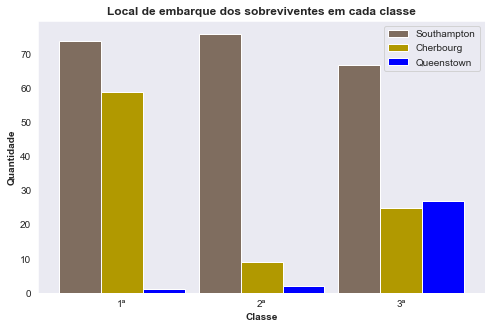

In [15]:
# Local de embarque dos sobreviventes de cada classe
info = dados[dados['Survived'] == 1][['Pclass', 'Embarked']]

b1 = info[info['Embarked'] == 'S'].groupby('Pclass').count()
b2 = info[info['Embarked'] == 'C'].groupby('Pclass').count()
b3 = info[info['Embarked'] == 'Q'].groupby('Pclass').count()

barHeight = 0.3
r = np.arange(len(b1.index))
r1 = [x - barHeight for x in r]
r2 = [x for x in r]
r3 = [x + barHeight for x in r]

plt.figure(figsize=(8,5))
barra1 = plt.bar(r1, b1['Embarked'], color='#7f6d5f', width=barHeight, edgecolor='white', label='Southampton')
barra2 = plt.bar(r2, b2['Embarked'], color='#B19900', width=barHeight, edgecolor='white', label='Cherbourg')
barra3 = plt.bar(r3, b3['Embarked'], color='#0000FF', width=barHeight, edgecolor='white', label='Queenstown')

plt.xticks([0,1,2], ('1ª', '2ª', '3ª'))
plt.title('Local de embarque dos sobreviventes em cada classe', fontweight='bold')
plt.xlabel('Classe', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')

plt.legend()
plt.show()

No gráfico abaixo podemos ver que, como esperado, o valor da passagem da 1ª classe é muito mais que das demais classes. Mas o que chama a atenção é que, na média, o valor das passagens da 2ª classe e 3ª classe são bem próximos.

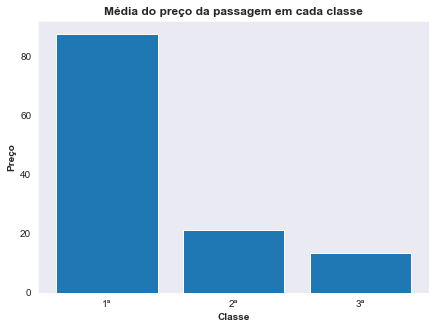

In [16]:
# Média do valor pago pelo bilhete em cada classe
info = dados[['Fare', 'Pclass']].groupby('Pclass').mean()

plt.figure(figsize=(7,5))
plt.bar(info.index, info['Fare'])
plt.title('Média do preço da passagem em cada classe', fontweight='bold')
plt.xlabel('Classe', fontweight='bold')
plt.ylabel('Preço', fontweight='bold')
plt.xticks([1,2,3], ('1ª', '2ª', '3ª'))
plt.show()

# Preparação dos Dados <a class="anchor" id="preparação_dados"></a>

#### Selecionando os atributos

O primeiro passo antes de iniciarmos a construção de um modelo de machine learning é a seleção dos melhores atributos, ou seja, aqueles que contenham alguma informação relevante que possa ser utilizada pelo nosso modelo. No caso do dataset do Titanic, os atributos que utilizaremos no treinamento do nosso modelo serão: Age, Embarked, Fare, Parch, Pclass, Sex, SibSp e Survived. Logo, todos os outros podem ser removidos do nosso dataset, com exceção da coluna PassengerId, já que esta será utilizada para gerar o arquivo com resultados a ser submetido no [Kaggle](https://www.kaggle.com).

In [17]:
dados_modelo = dados.drop(['index', 'Cabin', 'Name', 'Ticket'], axis=1)
dados_modelo.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,1,3,male,1,0.0
1,38.0,C,71.2833,0,2,1,female,1,1.0
2,26.0,S,7.9250,0,3,3,female,0,1.0
3,35.0,S,53.1000,0,4,1,female,1,1.0
4,35.0,S,8.0500,0,5,3,male,0,0.0


#### Valores faltantes

Como mencionado na etapa de [exploração dos dados](#exploração_dados), os atributos que possuem algum valor faltante são: Age, Embarked e Fare. Para fazer o preenchimento desses valores faltantes nos atributos Embarked e Fare, utilizaremos o valor mais frequente encontrado nesses atributos, conhecido como 'moda'. Quanto ao atributo Age, estes campos serão preenchidos com a média das idades desse atributo.

In [18]:
dados_modelo['Embarked'] = dados_modelo['Embarked'].fillna(dados_modelo['Embarked'].mode()[0])
dados_modelo['Fare'] = dados_modelo['Fare'].fillna(dados_modelo['Fare'].mode()[0])
dados_modelo['Age'] = dados_modelo['Age'].fillna(dados_modelo['Age'].mean())

print(dados_modelo.isnull().sum())

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dtype: int64


#### Valores não numéricos

Como os modelos que construiremos a seguir apenas trabalham com dados numéricos, será necessário converter os atributos Embarked e Sex para um formato numérico, de modo que sejam aceitos pelos modelos. O trecho de código a seguir cria uma nova coluna para cada valor único dos atributos Embarked e Sex.

In [19]:
aux = pd.get_dummies(dados_modelo['Embarked'], prefix='Embarked')
dados_modelo = pd.concat([dados_modelo, aux], axis=1)

aux = pd.get_dummies(dados_modelo['Sex'], prefix='Sex')
dados_modelo = pd.concat([dados_modelo, aux], axis=1)

dados_modelo = dados_modelo.drop(['Embarked', 'Sex'], axis=1)
dados_modelo.head()


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,7.2500,0,1,3,1,0.0,0,0,1,0,1
1,38.0,71.2833,0,2,1,1,1.0,1,0,0,1,0
2,26.0,7.9250,0,3,3,0,1.0,0,0,1,1,0
3,35.0,53.1000,0,4,1,1,1.0,0,0,1,1,0
4,35.0,8.0500,0,5,3,0,0.0,0,0,1,0,1


#### Separando o conjunto de treino e o conjunto de teste

Em seguida, é necessário fazer a separação do conjunto de treino e do conjunto de teste, já que havíamos combinado os dois conjuntos para fazer a exploração dos dados. Como a combinação dos dois conjuntos acrescentou o conjunto de teste ao final do conjunto de treino e o conjunto de teste tem 418 registros, utilizaremos essa informação para fazer a separação dos conjuntos.

In [20]:
tamanho_conjunto = dados_modelo.shape[0]
tamanho_conjunto_teste = 418

dados_modelo_treino = dados_modelo.iloc[:tamanho_conjunto - tamanho_conjunto_teste]
dados_modelo_teste = dados_modelo.iloc[tamanho_conjunto - tamanho_conjunto_teste:]

Em seguida, removi a coluna PassengerId dos dois conjuntos de dados, salvando a coluna PassengerId pertencente ao conjunto de teste, já que esta fará parte da resposta final que será submetida no [Kaggle](https://www.kaggle.com).

In [21]:
submissao = dados_modelo_teste[['PassengerId']]

dados_modelo_treino = dados_modelo_treino.drop(['PassengerId'], axis=1)
dados_modelo_teste = dados_modelo_teste.drop(['PassengerId'], axis=1)

# Modelagem <a class="anchor" id="modelagem"></a>

Finalizada a etapa de preparação dos dados, agora iremos construir alguns modelos de Machine Learning a fim de verificar a sua performance em prever se um determinado passageiro sobreviveu ou não ao naufrágio do Titanic.

Antes de construir algum modelo, é necessário separar do conjunto de treinamento o atributo Survived (atributo que queremos prever).

In [22]:
x_train = dados_modelo_treino.loc[:, dados_modelo_treino.columns != 'Survived']
y_train = dados_modelo_treino[['Survived']]

x_teste = dados_modelo_teste.loc[:, dados_modelo_teste.columns != 'Survived']

Abaixo foi implementada duas funções. A primeira exibira o score atingido pelo modelo construído e a segunda função exportará um arquivo csv com as previsões do modelo em cima do conjunto de testes.

In [23]:
# Calcula o score do modelo
def score_modelo(modelo, x_train, y_train):
    
    acc = round(modelo.score(x_train, y_train) * 100, 2)
    print("Acurácia do modelo: {}%".format(acc))

# Exporta um arquivo csv com as previsões
def exportar_resultado(modelo, x_teste, submissao):
    
    y_pred = modelo.predict(x_teste)
    submissao['Survived'] = y_pred.astype(int)
    
    submissao.to_csv('./submissao.csv', index=False)

### Decision Tree

In [24]:
modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(x_train, y_train)

score_modelo(modelo, x_train, y_train)

Acurácia do modelo: 84.06%


Como visto acima, nosso primeiro modelo treinado teve uma performance de 84.06% em cima do conjunto de treinamento. Um resultado bom para um primeiro modelo.

Para a construção deste modelo, foi selecionado como 5 a profundidade máxima da árvore de decisão. Em um primeiro teste realizado, não foi selecionado limite algum de profundidade da árvore e obtive uma acurácia de 98%. Mas isto é um problema porque esse resultado mostra que é como se a árvore estivesse 'decorando' o conjunto de treinamento, conceito conhecido como Overfitting. Se eu utilizasse esse modelo para submeter o resultado em cima do conjunto de testes, muito provavelmente eu obteria um resultado bem inferior aos 98%. 

In [25]:
exportar_resultado(modelo, x_teste, submissao)

Feita a previsão em cima do conjunto de testes, podemos fazer a submissão ao [Kaggle](https://www.kaggle.com) e verificar a acurácia do nosso modelo em cima de um conjunto de dados que ele não conhece e verificar seu desempenho.

O trecho de código acima exporta um arquivo csv a partir das previsões do modelo.

Na imagem abaixo podemos ver o resultado da nossa primeira submissão no [Kaggle](https://www.kaggle.com). O score atingido foi de 76.07%, um resultado bom para um primeiro modelo.

![](Imagens/Titanic/Titanic-Modelo1.PNG)

### SVC - Suport Vector Classifier

In [26]:
modelo = SVC()
modelo.fit(x_train, y_train)

score_modelo(modelo, x_train, y_train)

Acurácia do modelo: 89.11%


Utilizando SVC (Suport Vector Classifier), obtivemos uma acurácia melhor que o modelo utilizando um Árvore de Decisão. Agora executaremos o modelo em cima do conjunto de testes, exportaremos no formato csv e faremos a submissão no [Kaggle](https://www.kaggle.com) pra ver a sua acurácia.

In [27]:
exportar_resultado(modelo, x_teste, submissao)

Porém, como podemos ver na imagem abaixo, o resultado foi bem inferior se comparado com o modelo baseado em Árvore de Decisão, apesar de ter apresentado uma acurácia maior em cima do conjunto de treinamento.

![](Imagens/Titanic/Titanic-Modelo2.PNG)

### KNN - K Nearest Neighbors

In [28]:
modelo = KNeighborsClassifier(3)
modelo.fit(x_train, y_train)

score_modelo(modelo, x_train, y_train)

Acurácia do modelo: 83.73%


Assim como no modelo baseado em Árvore de Decisão, o KNN apresentou uma acurácia de aproximadamente 84%. Vejamos seu resultado agora em cima do conjunto de testes.

In [29]:
exportar_resultado(modelo, x_teste, submissao)

Como visto na iamgem abaixo, o KNN apresentou um resultado tão ruim quanto o resultado obtido através do SVC.

![](Imagens/Titanic/Titanic-Modelo3.PNG)

## AdaBoost

In [30]:
modelo = AdaBoostClassifier()
modelo.fit(x_train, y_train)

score_modelo(modelo, x_train, y_train)

Acurácia do modelo: 83.39%


In [31]:
exportar_resultado(modelo, x_teste, submissao)

Na imagem abaixo podemos ver que o resultado obtido em cima do conjunto de treinamento foi de 75.12%, valor bem próximo ao atingido pela Árvore de Decisão.

![](Imagens/Titanic/Titanic-Modelo4.PNG)

### Gradient Boosting

In [32]:
modelo = GradientBoostingClassifier()
modelo.fit(x_train, y_train)

score_modelo(modelo, x_train, y_train)

Acurácia do modelo: 89.23%


Dentre os modelos treinados até agora, este foi o que apresentou o melhor resultado, atingindo uma acurácia de 89,23%. Mas será que este valor se manterá após a execução do modelo em cima do conjunto de teste?

In [33]:
exportar_resultado(modelo, x_teste, submissao)

Após a submissão no [Kaggle](https://www.kaggle.com), vemos que obtivemos uma melhora de aproximadamente 2% se comparado com o modelo treinado usando uma Árvore de Decisão, atingindo um score de 78,47%.

![](Imagens/Titanic/Titanic-Modelo5.PNG)

# Avaliação <a class="anchor" id="avaliação"></a>

Os resultados obtidos através dos cinco modelos treinados apresentaram valores de acurácia entre 83,39% e 89,23% em cima do conjunto de treinamento. Já que em cima do conjunto de testes, a acurácia dos modelos variou entre 61,72% e 78.47%. Isto demonstra a ocorrência do overfitting, onde em alguns casos está mais evidente (modelo treinado utilizando o SVC) e em outros casos menos (modelo treinado utilizando a Árvore de Decisão). Mas este resultado é aceitável, visto que na etapa de [preparação dos dados](#preparação_dados) o trabalho realizado não foi muito aprofundado. Além disso, uma escolha mais cuidadosa dos parâmetros dos modelos podem acarretar em uma melhor acurácia e redução do overfitting, já que praticamente todos os parâmetros utilizados foram os parâmetros defaults.

# Conclusão <a class="anchor" id="conclusão"></a>

Através destes dados foi possível comprovar que de fato, como relatado no filme, não haviam botes salva-vidas suficiente para todos os passageiros a bordo do Titanic. Um ponto que podemos destacar também é que mesmo havendo o dobro de pessoas do sexo masculino no navio, a quantidade de sobreviventes do sexo feminino foi pelo menos duas vezes maior que a quantidade de sobreviventes do sexo masculino.

![](Imagens/Titanic/Titanic-Conclusão.png)

Na cena acima, Rose diz para a mãe dela que metade das pessoas do navio iriam morrer. Na cena seguinte seu noivo (Cal) diz que a metade "superior" não, se referindo às pessoas da primeira classe. Através da análise feita na [exploração dos dados](#exploração_dados), pudemos constatar que isso realmente aconteceu, já que cerca de 60% dos passageiros da primeira classe sobreviveram, enquanto que apenas aproximadamente 20% dos passageiros da terceira classe sobreviveram.